# 입문자를 위한, 파이썬/R 데이터 분석

## Today's mission

- 워드클라우드 : 다음뉴스 키워드 검색 및 텍스트 분석
- 워드클라우드 : soynlp 라이브러리 활용 명사 추출

## 워드클라우드 : 다음뉴스 키워드 검색 및 텍스트 분석

참고 : 다음 뉴스 사이트 기사목록 크롤링 및 텍스트 분석

In [1]:
# !pip install konlpy
# !pip install wordcloud

- [KoNLPy를 위한 자바 설치](https://www.codeit.kr/tutorials/43/KoNLPy-%EC%84%A4%EC%B9%98%ED%95%98%EA%B8%B0-Windows)

In [2]:
import requests
from bs4 import BeautifulSoup
import re
from konlpy.tag import Okt
from collections import Counter
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import time

- 검색어 및 검색페이지 수 입력

In [56]:
# 검색어 입력
keyword = input("검색어를 입력하세요.")

검색어를 입력하세요.손흥민


In [57]:
# 검색페이지 입력
lastpage = int(input("마지막 페이지 번호를 입력하세요."))

마지막 페이지 번호를 입력하세요.3


- 다음 뉴스 검색 : 상기 검색어 및 페이지수 활용

In [58]:
titleList = []

for i in range(1, lastpage+1, 1) :
    #url = f"https://search.naver.com/search.naver?where=news&sm=tab_jum&query={keyword}&start=[{i}]"
    url = f"https://search.daum.net/search?w=news&nil_search=btn&DA=PGD&enc=utf8&cluster=y&cluster_page=1&q={keyword}&p={i}"
    print(url)
    response = requests.get(url)
    html = response.text
    soup = BeautifulSoup(html, 'html.parser')
    
    titles = soup.select("ul.c-list-basic")
    #subtitles = soup.select("a.elss.sub_tit")
    
    for title in titles : # titles에서 title
        titleText = title.text # title.text만 추출
        #print(titleText)
        titleList.append(titleText) # titleList에 추가
    
    time.sleep(3)

https://search.daum.net/search?w=news&nil_search=btn&DA=PGD&enc=utf8&cluster=y&cluster_page=1&q=손흥민&p=1
https://search.daum.net/search?w=news&nil_search=btn&DA=PGD&enc=utf8&cluster=y&cluster_page=1&q=손흥민&p=2
https://search.daum.net/search?w=news&nil_search=btn&DA=PGD&enc=utf8&cluster=y&cluster_page=1&q=손흥민&p=3


In [59]:
titleList[0]

'            스포츠조선       개별문서메뉴  톡으로 바로 공유 공유하기           4         \'SON 바람 이뤄졌나?\' 페네르바체, 토트넘-에이전트 만났지만 결국 포기→\'이적설 종료!\'...손흥민 대안 준비 중       AFP연합뉴스 AFP연합뉴스 [스포츠조선 이현석 기자]최근 잦은 이적설로 고생했던 손흥민에게 희소식이 전해졌다. 계속해서 손흥민 이적설에 이름을 올리던 페네르바체가 손흥민을 포기하고 다른 선수로 돌아설 것이라는 소식이다. 영국의 스포츠위트니스는 12일(한국...    6시간전                 조선일보       개별문서메뉴  톡으로 바로 공유 공유하기                 “손흥민 다리 부러뜨리자”…도 넘은 中 유행 짤       손흥민이 휠체어에 타고 있는 합성 사진이 중국 SNS에 퍼졌다. /이토랜드 중국에서 한국 축구 대표팀 주장 손흥민이 다리를 다쳐 휠체어에 타고 있는 합성 사진이 퍼져 논란이다. 지난 11일 한 온라인 커뮤니티에는 ‘한 vs 중 축구 관련해서 중국 인터넷에서 유행...    30분전                 인터풋볼   언론사 픽     개별문서메뉴  톡으로 바로 공유 공유하기           5         "SON, 토트넘 역사상 최고의 선수 중 한 명!" 손흥민, 전 세계 축구 선수 랭킹 TOP 20 선정       사진=CBS 스포츠 [인터풋볼] 주대은 기자 = 토트넘 홋스퍼 주장 손흥민이 전 세계 축구 선수 랭킹 20위에 선정됐다. 미국 \'CBS 스포츠\'는 13일(한국시간) 전 세계 축구 선수 랭킹 TOP 100을 선정해 발표했다. 20위에 손흥민이 선정됐다. 매체는 손흥민을 두고 "다른...    53분전                 MHN스포츠       개별문서메뉴  톡으로 바로 공유 공유하기           5         \'역시 월클\' 손흥민, 美 매체 선정 전 세계 축구선수 20위 등극...영광의 1위는 누구?       토트

In [60]:
# 한글만 추출
def text_cleaning(text) :
    hangul = re.compile('[^ ㄱ-ㅣ가-힣]+')
    result = hangul.sub('', text)
    return result

In [61]:
text_cleaning(titleList[0])

'            스포츠조선       개별문서메뉴  톡으로 바로 공유 공유하기                     바람 이뤄졌나 페네르바체 토트넘에이전트 만났지만 결국 포기이적설 종료손흥민 대안 준비 중       연합뉴스 연합뉴스 스포츠조선 이현석 기자최근 잦은 이적설로 고생했던 손흥민에게 희소식이 전해졌다 계속해서 손흥민 이적설에 이름을 올리던 페네르바체가 손흥민을 포기하고 다른 선수로 돌아설 것이라는 소식이다 영국의 스포츠위트니스는 일한국    시간전                 조선일보       개별문서메뉴  톡으로 바로 공유 공유하기                 손흥민 다리 부러뜨리자도 넘은  유행 짤       손흥민이 휠체어에 타고 있는 합성 사진이 중국 에 퍼졌다 이토랜드 중국에서 한국 축구 대표팀 주장 손흥민이 다리를 다쳐 휠체어에 타고 있는 합성 사진이 퍼져 논란이다 지난 일 한 온라인 커뮤니티에는 한  중 축구 관련해서 중국 인터넷에서 유행    분전                 인터풋볼   언론사 픽     개별문서메뉴  톡으로 바로 공유 공유하기                     토트넘 역사상 최고의 선수 중 한 명 손흥민 전 세계 축구 선수 랭킹   선정       사진 스포츠 인터풋볼 주대은 기자  토트넘 홋스퍼 주장 손흥민이 전 세계 축구 선수 랭킹 위에 선정됐다 미국  스포츠는 일한국시간 전 세계 축구 선수 랭킹  을 선정해 발표했다 위에 손흥민이 선정됐다 매체는 손흥민을 두고 다른    분전                 스포츠       개별문서메뉴  톡으로 바로 공유 공유하기                    역시 월클 손흥민  매체 선정 전 세계 축구선수 위 등극영광의 위는 누구       토트넘 홋스퍼 공격수 손흥민 스포츠 금윤호 기자 대한민국 축구대표팀과 토트넘 홋스퍼잉글랜드 주장을 맡고 있는 손흥민이 월드클래스로 인정받았다 미국 스포츠는 일한국시간 전 세계 축구선수 랭킹 을 발표한 가운데 한국 선수로는 유일 

- [map 과 lambda 참고](https://wikidocs.net/32#map)

In [62]:
# 전처리 : 한글만 추출
titleList = list(map(lambda x:text_cleaning(x), titleList))

In [63]:
titleList[0]

'            스포츠조선       개별문서메뉴  톡으로 바로 공유 공유하기                     바람 이뤄졌나 페네르바체 토트넘에이전트 만났지만 결국 포기이적설 종료손흥민 대안 준비 중       연합뉴스 연합뉴스 스포츠조선 이현석 기자최근 잦은 이적설로 고생했던 손흥민에게 희소식이 전해졌다 계속해서 손흥민 이적설에 이름을 올리던 페네르바체가 손흥민을 포기하고 다른 선수로 돌아설 것이라는 소식이다 영국의 스포츠위트니스는 일한국    시간전                 조선일보       개별문서메뉴  톡으로 바로 공유 공유하기                 손흥민 다리 부러뜨리자도 넘은  유행 짤       손흥민이 휠체어에 타고 있는 합성 사진이 중국 에 퍼졌다 이토랜드 중국에서 한국 축구 대표팀 주장 손흥민이 다리를 다쳐 휠체어에 타고 있는 합성 사진이 퍼져 논란이다 지난 일 한 온라인 커뮤니티에는 한  중 축구 관련해서 중국 인터넷에서 유행    분전                 인터풋볼   언론사 픽     개별문서메뉴  톡으로 바로 공유 공유하기                     토트넘 역사상 최고의 선수 중 한 명 손흥민 전 세계 축구 선수 랭킹   선정       사진 스포츠 인터풋볼 주대은 기자  토트넘 홋스퍼 주장 손흥민이 전 세계 축구 선수 랭킹 위에 선정됐다 미국  스포츠는 일한국시간 전 세계 축구 선수 랭킹  을 선정해 발표했다 위에 손흥민이 선정됐다 매체는 손흥민을 두고 다른    분전                 스포츠       개별문서메뉴  톡으로 바로 공유 공유하기                    역시 월클 손흥민  매체 선정 전 세계 축구선수 위 등극영광의 위는 누구       토트넘 홋스퍼 공격수 손흥민 스포츠 금윤호 기자 대한민국 축구대표팀과 토트넘 홋스퍼잉글랜드 주장을 맡고 있는 손흥민이 월드클래스로 인정받았다 미국 스포츠는 일한국시간 전 세계 축구선수 랭킹 을 발표한 가운데 한국 선수로는 유일 

- 텍스트 전처리 : 명사의 빈도수 계산

In [64]:
# 텍스트 전처리
title_corpus = " ".join(titleList) # 말뭉치
nouns_tagger = Okt() # 명사 추출
nouns = nouns_tagger.nouns(title_corpus)

In [65]:
nouns[:10]

['스포츠조선', '개별', '문서', '메뉴', '톡', '바로', '공유', '공유', '바람', '페네르바체']

In [66]:
count = Counter(nouns) # 각 명사의 빈도수 계산

In [67]:
# 각 명사의 빈도수 계산
count

Counter({'스포츠조선': 7,
         '개별': 30,
         '문서': 30,
         '메뉴': 30,
         '톡': 30,
         '바로': 30,
         '공유': 60,
         '바람': 1,
         '페네르바체': 2,
         '토트넘': 35,
         '에이전트': 1,
         '포기': 2,
         '이적설': 3,
         '종료': 1,
         '손흥민': 85,
         '대안': 1,
         '준비': 1,
         '중': 4,
         '연합뉴스': 7,
         '이현석': 1,
         '기자': 17,
         '최근': 1,
         '고생': 1,
         '희소식': 1,
         '계속': 1,
         '이름': 2,
         '다른': 2,
         '선수': 23,
         '것': 1,
         '소식': 1,
         '영국': 2,
         '스포츠': 12,
         '위트': 1,
         '니스': 1,
         '일한국': 7,
         '간전': 25,
         '조선일보': 1,
         '다리': 6,
         '부러': 2,
         '리자도': 1,
         '유행': 6,
         '짤': 2,
         '휠체어': 4,
         '타고': 4,
         '합성': 5,
         '사진': 12,
         '중국': 27,
         '이토': 1,
         '랜드': 1,
         '한국': 19,
         '축구': 35,
         '대표팀': 9,
         '주장': 11,
         '논

- 텍스트 전처리 : 불용어 처리

In [68]:
# 불용어처리명
remove_char_counter = Counter({x:count[x] for x in count if len(x) > 1})

# 불용어 텍스트 파일 경로
korean_stopwords_path = "data/stopwords-ko.txt"

# 불용어 로드
with open(korean_stopwords_path, encoding='utf8') as f:
    stopwords = f.readlines()
stopwords = [x.strip() for x in stopwords]

# 나무위키에서 추가한 불용어
namu_wiki_stopwords = ['상위', '문서', '내용', '누설', '아래', '해당', '설명',
                       '표기', '추가', '모든', '사용', '매우', '가장', '줄거리',
                       '요소', '상황', '편집', '틀', '경우', '때문', '모습',
                       '정도', '이후', '사실', '생각', '인물', '이름', '년월', '공유', 
                       '메뉴'] ##### 개별적 불용어 추가

# 불용어 추가
stopwords.extend(namu_wiki_stopwords)

# 불용어 처리
remove_char_counter = Counter({x:remove_char_counter[x] for x in remove_char_counter if x not in stopwords})

In [69]:
remove_char_counter

Counter({'스포츠조선': 7,
         '개별': 30,
         '바람': 1,
         '페네르바체': 2,
         '토트넘': 35,
         '에이전트': 1,
         '포기': 2,
         '이적설': 3,
         '종료': 1,
         '손흥민': 85,
         '대안': 1,
         '준비': 1,
         '연합뉴스': 7,
         '이현석': 1,
         '기자': 17,
         '최근': 1,
         '고생': 1,
         '희소식': 1,
         '계속': 1,
         '선수': 23,
         '소식': 1,
         '영국': 2,
         '스포츠': 12,
         '위트': 1,
         '니스': 1,
         '일한국': 7,
         '간전': 25,
         '조선일보': 1,
         '다리': 6,
         '부러': 2,
         '리자도': 1,
         '유행': 6,
         '휠체어': 4,
         '타고': 4,
         '합성': 5,
         '사진': 12,
         '중국': 27,
         '이토': 1,
         '랜드': 1,
         '한국': 19,
         '축구': 35,
         '대표팀': 9,
         '주장': 11,
         '논란': 4,
         '지난': 4,
         '온라인': 4,
         '커뮤니티': 4,
         '관련': 4,
         '인터넷': 2,
         '분전': 7,
         '인터': 6,
         '풋볼': 7,
         '언론사': 9,
       

- 텍스트 전처리 : 명사의 분석 대상 갯수 지정

In [70]:
# 빈도수 특정 명사의 갯수 지정
ranked_tags = remove_char_counter.most_common(50) # 빈도순 n개 단어

In [71]:
#ranked_tags

In [72]:
pd.DataFrame(ranked_tags)

,0,1
0,손흥민,85
1,토트넘,35
2,축구,35
3,개별,30
4,중국,27
5,간전,25
6,선수,23
7,한국,19
8,세계,18
9,기자,17


- 워드클라우드

In [73]:
###### [WordCloud 오류 해결]
# !pip install --upgrade pip
# !pip install --upgrade Pillow

In [74]:
remove_char_counter

Counter({'스포츠조선': 7,
         '개별': 30,
         '바람': 1,
         '페네르바체': 2,
         '토트넘': 35,
         '에이전트': 1,
         '포기': 2,
         '이적설': 3,
         '종료': 1,
         '손흥민': 85,
         '대안': 1,
         '준비': 1,
         '연합뉴스': 7,
         '이현석': 1,
         '기자': 17,
         '최근': 1,
         '고생': 1,
         '희소식': 1,
         '계속': 1,
         '선수': 23,
         '소식': 1,
         '영국': 2,
         '스포츠': 12,
         '위트': 1,
         '니스': 1,
         '일한국': 7,
         '간전': 25,
         '조선일보': 1,
         '다리': 6,
         '부러': 2,
         '리자도': 1,
         '유행': 6,
         '휠체어': 4,
         '타고': 4,
         '합성': 5,
         '사진': 12,
         '중국': 27,
         '이토': 1,
         '랜드': 1,
         '한국': 19,
         '축구': 35,
         '대표팀': 9,
         '주장': 11,
         '논란': 4,
         '지난': 4,
         '온라인': 4,
         '커뮤니티': 4,
         '관련': 4,
         '인터넷': 2,
         '분전': 7,
         '인터': 6,
         '풋볼': 7,
         '언론사': 9,
       

In [75]:
### 워드클라우드
wc = WordCloud(font_path='data/malgun.ttf', 
               width=1200, height=500, scale=4.0, max_font_size=600, background_color='white')
gen = wc.generate_from_frequencies(remove_char_counter)

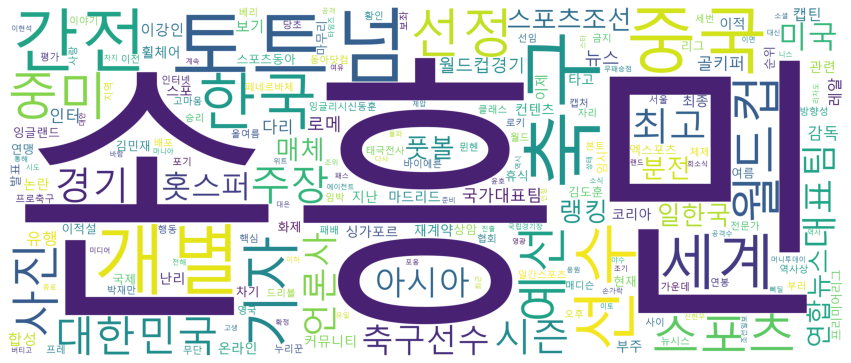

In [76]:
# 워드클라우드 그리기 및 파일로 저장
plt.figure(figsize=(15, 7))
plt.imshow(gen)
plt.axis('off')
plt.savefig(f'data/daumNews_wc_{keyword}.png')

In [83]:
### 워드클라우드 상위 N개 대상
wc = WordCloud(font_path='data/malgun.ttf', width=1200, height=500,
               scale=4.0, max_font_size=600, background_color='white')
gen = wc.generate_from_frequencies(dict(ranked_tags))

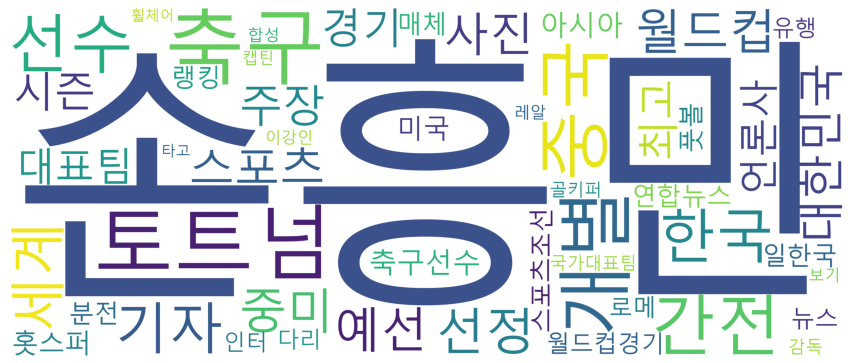

In [84]:
# 워드클라우드 그리기 및 파일로 저장
plt.figure(figsize=(15, 7))
plt.imshow(gen)
plt.axis('off')
plt.savefig(f'data/daumNews_wcN_{keyword}.png')